# PROJECT : Using Decision Tree to understand Road accident in Songkran Festival

### GROUP : 
#### 1. Arunwat Moonbung        | 6131501066
#### 2. Natthida Patlee         | 6131501016
#### 3. Nattawadee Philuekruang | 6131501021
#### 3. Piya Jairat             | 6131501035
#### 4. Wirakan Keawkanya       | 6131501054


### INCLUDE ALL IMPORTANT LIBRARY INTO PROJECT HERE

In [79]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'tahoma'

### IMPORT songkran.csv file

In [80]:
songkran_original_dataset = pd.read_csv('songkran.csv',engine='python')

## Data Pre-processing

## Basic Exploration and Data Cleaning
### Number of Row x Columns, data types and statistic

In [81]:
#dtypes display maximum 150 columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
display("Number of Row x Columns of Original dataset", songkran_original_dataset.shape)
display("Columns and their data types",songkran_original_dataset.dtypes)

'Number of Row x Columns of Original dataset'

(202298, 19)

'Columns and their data types'

Year                  object
ProvinceCode           int64
Province              object
HospitalCode           int64
HospitalName          object
Date                   int64
Time                  object
Sex                   object
Age                  float64
AccidentPlace         object
CasualtyStatus        object
CasualtyVehicle       object
DisputantVehicle      object
PreventiveMeasure     object
Alchohol              object
TransferMethod        object
Refer-Admit           object
Results               object
DateCured              int64
dtype: object

In [82]:
display("Statistic of numeric features", songkran_original_dataset.describe())
display("Statistic of category features", songkran_original_dataset.describe(include=['object']))

'Statistic of numeric features'

,ProvinceCode,HospitalCode,Date,Age,DateCured
count,202298.000000,202298.000000,202298.000000,199457.000000,202298.000000
mean,48.358733,11332.568770,13.699068,25.697103,0.296686
std,24.091981,1384.988602,1.810722,17.011527,1.610224
min,10.000000,10660.000000,10.000000,1.000000,0.000000
25%,30.000000,10772.000000,12.000000,15.000000,0.000000
50%,47.000000,11048.000000,13.000000,22.000000,0.000000
75%,67.000000,11330.000000,15.000000,36.000000,0.000000
max,97.000000,34563.000000,18.000000,99.000000,31.000000


'Statistic of category features'

,Year,Province,HospitalName,Time,Sex,AccidentPlace,CasualtyStatus,CasualtyVehicle,DisputantVehicle,PreventiveMeasure,Alchohol,TransferMethod,Refer-Admit,Results
count,202298,202298,202298,200762,202298,197029,200538,198949,189082,189895,190023,202298,202298,202298
unique,7,146,1260,24,2,3,4,11,11,3,2,9,4,2
top,สงกรานต์ 51,Nakhon Ratchasima,บางละมุง,17:01-18:00 น.,Male,Countryside,Rider,Motorcycle,None,Not Wearing a helmet,No,Victim / Relative,No,Injured
freq,32328,9076,1143,16997,133065,104167,129116,153601,115288,161577,120957,127992,155300,199350


### Basic Exploration | Observing Missing Value in Columns
### Since all columns has missing value less than 50%, No Columns are removed!

In [83]:
display('Missing Value in each Columns')
display(songkran_original_dataset.isnull().sum(axis=0)/len(songkran_original_dataset)*100)

'Missing Value in each Columns'

Year                 0.000000
ProvinceCode         0.000000
Province             0.000000
HospitalCode         0.000000
HospitalName         0.000000
Date                 0.000000
Time                 0.759276
Sex                  0.000000
Age                  1.404364
AccidentPlace        2.604573
CasualtyStatus       0.870004
CasualtyVehicle      1.655479
DisputantVehicle     6.532937
PreventiveMeasure    6.131054
Alchohol             6.067781
TransferMethod       0.000000
Refer-Admit          0.000000
Results              0.000000
DateCured            0.000000
dtype: float64

## Univariate Analysis
### Categorical features

In [84]:
songkran_categorical_dataset = songkran_original_dataset.select_dtypes(include=['object'])
display(songkran_categorical_dataset.columns)

Index(['Year', 'Province', 'HospitalName', 'Time', 'Sex', 'AccidentPlace',
       'CasualtyStatus', 'CasualtyVehicle', 'DisputantVehicle',
       'PreventiveMeasure', 'Alchohol', 'TransferMethod', 'Refer-Admit',
       'Results'],
      dtype='object')

C:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python38\lib\site-packages\seaborn\_dec

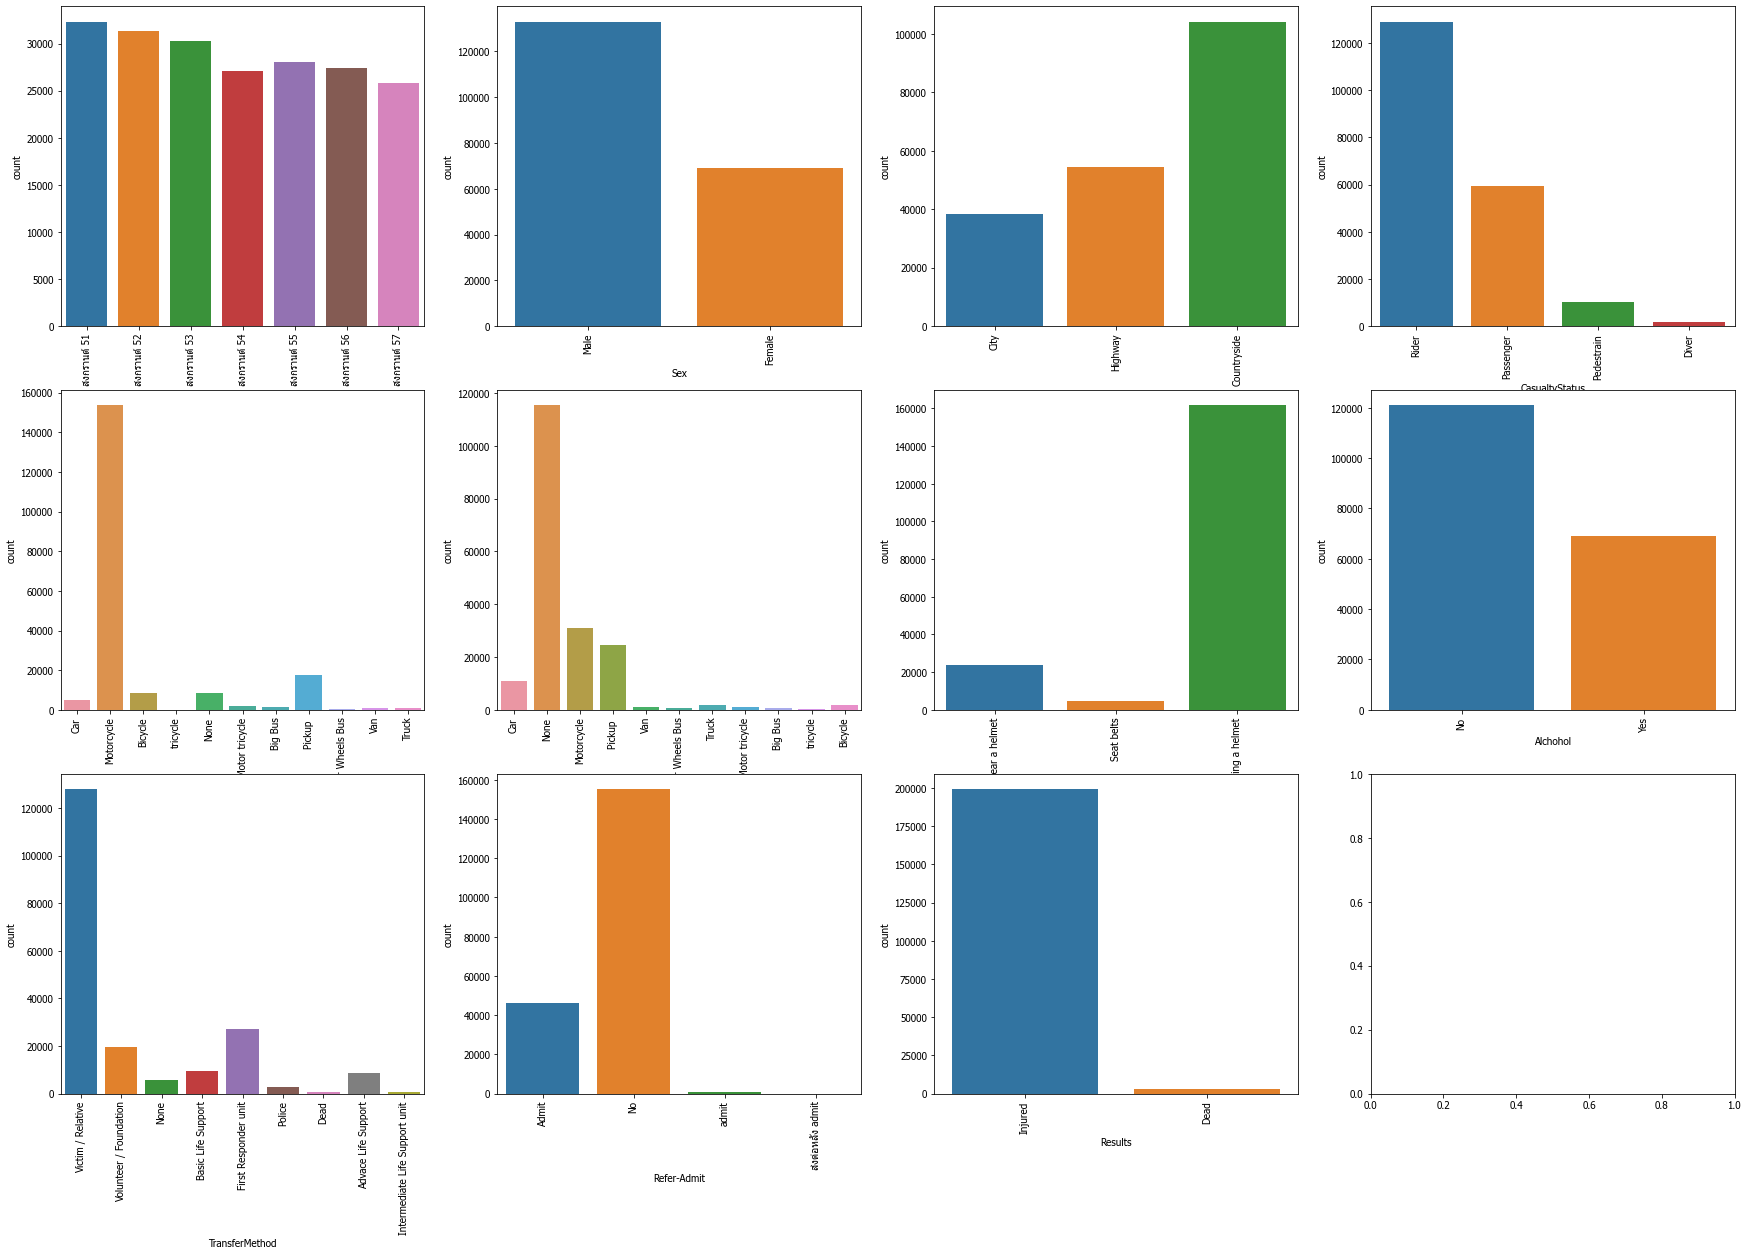

In [90]:
songkran_categorical_group1 = ['Year', 'Sex', 'AccidentPlace','CasualtyStatus', 'CasualtyVehicle', 'DisputantVehicle',
                                'PreventiveMeasure', 'Alchohol', 'TransferMethod', 'Refer-Admit', 'Results']

fig, ax = plt.subplots(3, 4, figsize=(30,20))
for i, subplot in zip(songkran_categorical_group1, ax.flatten()):
        chart = sb.countplot(songkran_categorical_dataset[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


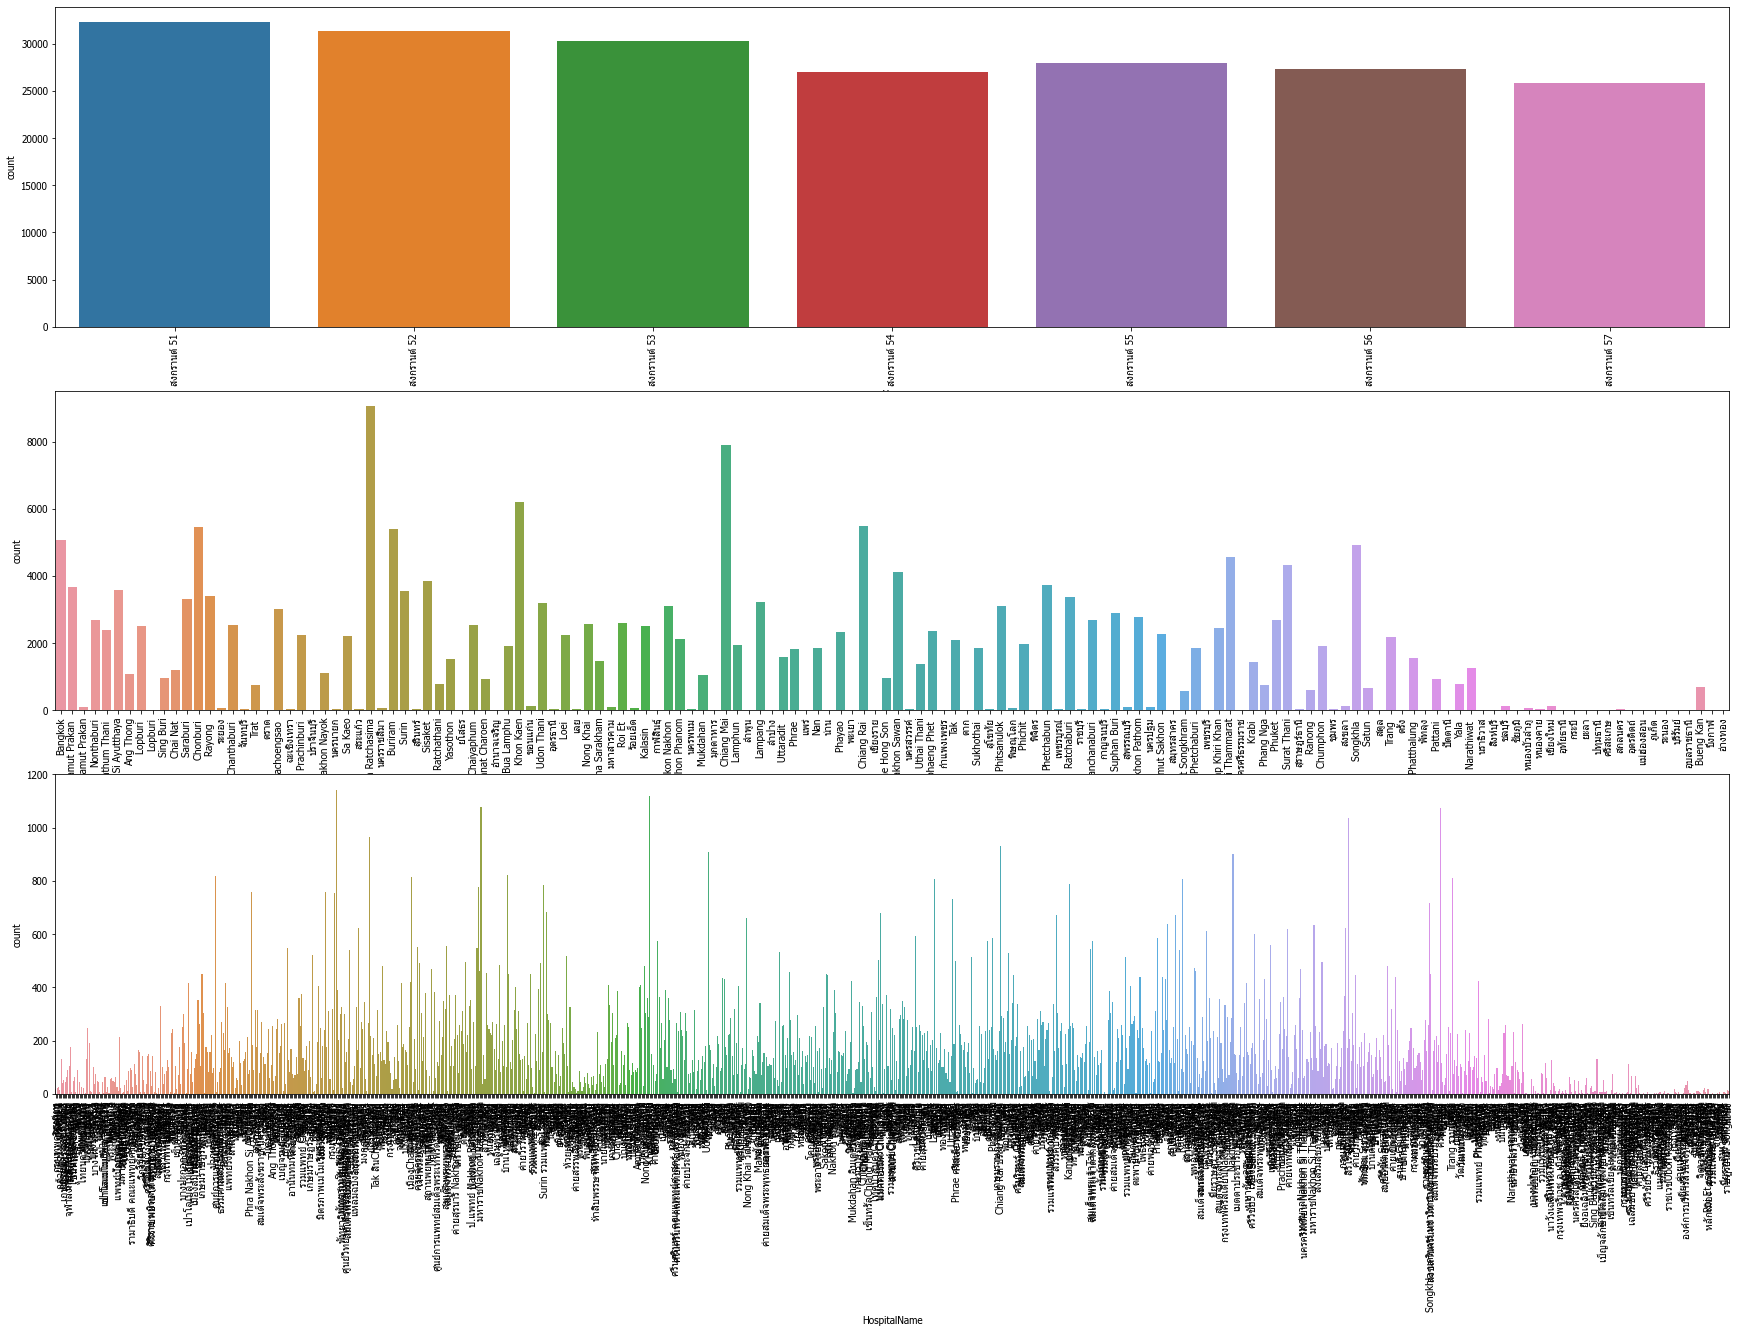

In [91]:
songkran_categorical_group2 = ['Province', 'HospitalName', 'Time']

fig, ax = plt.subplots(3, 1, figsize=(30,20))
for i, subplot in zip(songkran_categorical_dataset, ax.flatten()):
        chart = sb.countplot(songkran_categorical_dataset[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Numerical features

In [85]:
#TEST

## Data cleansing
### Remove Scope and Duplicate meaning and Irrevant of Columns and Row

## Bivariate Analysis?

## Feature Engineering

## Decision Tree, Feature Importance
#### USED TO FIND IMPORTANT Feature which can be used to improve accuracy of decision tree!

In [86]:
# In progress of Studying...

## Last-time Data Cleaning

## Model Development

## Model Analysis